### **Adult Contents Detector - Test**

아래 과정은 cnn model의 demo 버전입니다.

전처리 단계
numpy 변환 단계
학습 단계
테스트 단계로 나뉘어져있습니다.

정사각형의 고정된 input 크기를 위해 128x128 크기로 똑같이 resize 할 것입니다.
크기는 속도를 보고 조정할 것입니다.

---



225 225 3


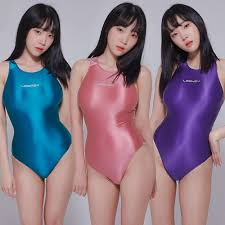

In [1]:
#이미지 읽어지는지 테스트
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/soft/soft_0.jfif')
height, width, channel = img.shape
print(height, width , channel)
cv2_imshow(img) 

In [2]:
#이미지를 모두 128x128로 resize
import glob
import os

img_benign_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/'
folder_list = ['normal','soft','adult']

for i in range (3) :
  img_path_selected = img_benign_path + folder_list[i]
  file_paths = glob.glob(os.path.join(img_path_selected, "*.jpg"))
  index = 0
  print(file_paths)
  for img in file_paths:
    img = cv2.imread(img)
    resized_img = cv2.resize(img, dsize=(128, 128))
    name = str(index)
    #resize한 사진들 normal = 0 / soft = 1 / adult = 2 폴더에 저장
    new_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/'+str(i)+"/"
    print(cv2.imwrite(new_path+name+".jpg", resized_img)) #본 과에서는 print는 생략하는 것이 좋음, 현재는 데이터양이 적기에 수행
    index += 1
  print(index)

['/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/normal/normal_0.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/normal/normal_1.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/normal/normal_2.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/normal/normal_3.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/normal/normal_4.jpg']
True
True
True
True
True
5
['/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/soft/soft_4.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/soft/soft_3.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/soft/soft_2.jpg', '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/soft/soft_1.jpg']
True
True
True
True
4
['/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/adult/adult_0.jpg', '/content/drive/MyDrive/20

In [6]:
#resize한 이미지들을 배열 형태로 변환
import glob
import numpy as np
from PIL import Image

img_benign_path = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/'
categories = ['0','1', '2']
np_classes = len(categories)

X=[]
y=[]

for idx, cat in enumerate(categories):
    img_dir_detail = img_benign_path + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")
    print("category : "+cat)  #0은 normal, 1은 soft, 2는 adult
    print(len(glob.glob(img_dir_detail+"/*.jpg"))) #파일 수 출력
    
    for i, f in enumerate(files):
      try:
        img = Image.open(f)
        img = img.convert("RGB")
        data = np.asarray(img) #RGB이미지를 배열로 변환
        #Y는 0 아니면 1이니까 idx값으로 넣는다.
        X.append(data)  #값을 하나씩 추가
        y.append(idx)   #labeling도 추가
      except:
        print(cat, str(i)+" 번째에서 에러 ")

X = np.array(X) #각각 numpy 배열로 만들어줌
Y = np.array(y)

category : 0
5
category : 1
4
category : 2
5


In [8]:
#NumPy format의 바이너리 파일로 저장하여 후작업에 대비
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

Y_train = to_categorical(Y_train, 3)
Y_test = to_categorical(Y_test, 3)

print(Y_train)  #12개
print(Y_test)   #2개
xy = (X_train, X_test, Y_train, Y_test)
np.save('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/128X128_image.npy', xy) #1개의 배열을 NumPy format의 바이너리 파일로 저장하기

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
#저장한 npy파일 가져와서 dataset 세팅
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras
import keras.backend as K
import tensorflow as tf

X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/128X128_image.npy', allow_pickle=True) ###allow_pickle
print(X_train.shape)
print(y_train.shape)
print(X_train.shape[0])
print(y_train.shape[0])

(12, 128, 128, 3)
(12, 3)
12
12


In [12]:
#model 설계
image_w = 128
image_h = 128
image_channels = 3
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model = Sequential()
#필터 수 : 32개, 필터의 크기 : (3,3), 활성함수 : relu, input_shape : 128*128*3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_w, image_h, image_channels)))
#batch normalization적용 (데이터의 shape 변동 없음)
model.add(BatchNormalization())
#conv 출력 데이터에 (2,2) maxpooling 적용 (shape가 절반으로 줄어들고 채널 수는 그대로)
model.add(MaxPooling2D(pool_size=(2, 2)))


#두번째 레이어부터는 자동으로 입력 형태를 추정할 수 있기 때문에 따로 입력해주지 않아도 된다.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

#입력 데이터를 1차원으로 번형시킴 (default : rows->cols->channels순으로 변형)
model.add(Flatten())
#dense : 출력 데이터의 shape를 (,512)로 지정
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))   #출력 layer, class가 3개이므로 3, multi classification이기에 softmax

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])

model.summary()

import os

model_dir = '/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
model_path = model_dir + "128x128_adult_contents_detection.model"

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)      

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

print(X_train.shape)
print(y_train.shape)

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

(12, 128, 128, 3)
(12, 3)


In [14]:
#model 학습
history = model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
12/12 [==============================] - 2s 97ms/step - loss: 1.0991 - accuracy: 0.1415
Epoch 2/5
12/12 [==============================] - 1s 100ms/step - loss: 1.0980 - accuracy: 0.5746
Epoch 3/5
12/12 [==============================] - 1s 95ms/step - loss: 1.0944 - accuracy: 0.6477
Epoch 4/5
12/12 [==============================] - 1s 92ms/step - loss: 1.0908 - accuracy: 0.7320
Epoch 5/5
12/12 [==============================] - 1s 95ms/step - loss: 1.0968 - accuracy: 0.4398


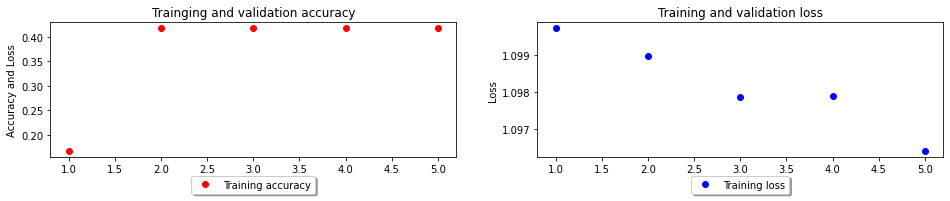

In [18]:
#accuracy, loss 확인 그래프 그리기
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['accuracy']
    #val_accuracy = history_dict['val_accuracy']  #validation 존재 시 사용
    loss = history_dict['loss']
    #val_loss = history_dict['val_loss']  #validation 존재 시 사용

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    #plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    #plt.plot(epochs, val_loss, 'b', label='Validation loss') #validation 존재 시 사용
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

show_graph(history.history)

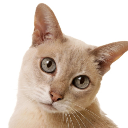

True


In [21]:
#이미지 128x128로 resize
img = cv2.imread('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/test_1.jpg')
resized_img = cv2.resize(img, dsize=(128, 128))
cv2_imshow(resized_img)
print(cv2.imwrite("/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/"+"resized_test_1"+".jpg", resized_img))

In [26]:
predict_image_path = "/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/"+"resized_test_1.jpg"
img = io.imread(predict_image_path)
img = np.expand_dims(img, axis= 0)
pred = model(img, training=False)
print(pred)
print(np.argmax(pred, axis=1))

tf.Tensor([[9.999275e-01 0.000000e+00 7.242307e-05]], shape=(1, 3), dtype=float32)
[0]


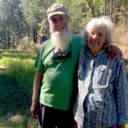

In [27]:
#이미지 128x128로 resize
img = cv2.imread('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/test_2.jpg')
cv2_imshow(img)

In [28]:
predict_image_path = "/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/"+"test_2.jpg"
img = io.imread(predict_image_path)
img = np.expand_dims(img, axis= 0)
pred = model(img, training=False)
print(pred)
print(np.argmax(pred, axis=1))

tf.Tensor([[3.1939037e-14 8.9061078e-37 1.0000000e+00]], shape=(1, 3), dtype=float32)
[2]


In [29]:
#X_train을 그냥 predict으로 넣어봄
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/2021 Sillicon Valley - Flame Coding Pirate/test/128X128_image.npy', allow_pickle=True) ###allow_pickle
pred = model(X_train, training=False)
print(pred) #실제 결과
print(np.argmax(pred, axis=1))  #최대 index만 뽑아냄

tf.Tensor(
[[1.0157847e-11 0.0000000e+00 1.0000000e+00]
 [1.8865479e-11 0.0000000e+00 1.0000000e+00]
 [5.5620058e-28 0.0000000e+00 1.0000000e+00]
 [4.6013895e-10 0.0000000e+00 1.0000000e+00]
 [4.1073690e-19 0.0000000e+00 1.0000000e+00]
 [9.9999976e-01 0.0000000e+00 2.5151894e-07]
 [2.5605885e-34 0.0000000e+00 1.0000000e+00]
 [9.4708394e-06 0.0000000e+00 9.9999058e-01]
 [4.8859237e-04 6.4348049e-36 9.9951136e-01]
 [1.7662806e-12 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 9.6060164e-16]
 [9.9999130e-01 0.0000000e+00 8.7500503e-06]], shape=(12, 3), dtype=float32)
[2 2 2 2 2 0 2 2 2 2 0 0]
